In [ ]:
pip install rocketpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 KB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.9 MB/s eta 0:00:00
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65875 sha256=91b95b53d344526290edefd7324f5375d7833c67c256db2f3f70b2b04e00b44d
  Stored in directory: /root/.cache/pip/wheels/61/7c/b1/a15afd1959498020ff45abc6e309b5c48975a5d741e60c5922
Successfully built simplekml
  Attempting uninstall: netCDF4
    Found existing installation: netCDF4 1.6.2
    Uninstalling netCDF4-1.6.2:
      Successfully uninstalled netCDF4-1.6.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rocketpy import Environment,Rocket,SolidMotor,Flight
from mpl_toolkits import mplot3d
from datetime import datetime
from rocketpy.EnvironmentAnalysis import EnvironmentAnalysis
import pytz
import os
import csv


In [ ]:
# Analyzing wind speeds in bayboro in for the month of FEB for the past 10 years.

env_analysis = EnvironmentAnalysis(
    start_date=datetime(2023, 1, 1),  # (Year, Month, Day)
    end_date=datetime(2023, 2, 26),  # (Year, Month, Day)
    start_hour=0,
    end_hour=23,
    latitude=35.13,
    longitude=-76.8126,
    surfaceDataFile="surface.nc",
    pressureLevelDataFile="pressure.nc",
    timezone="America/New_York",
    unit_system="metric",
)

In [ ]:
env_analysis.allInfo()

Dataset Information: 
Time Period: From  2023-01-01 00:00:00-05:00  to  2023-02-26 00:00:00-05:00
Available hours: From  0  to  23
Surface Data File Path:  surface.nc
Latitude Range: From  35.5 ° To  34.5 °
Longitude Range: From  -77.0 ° To  -76.0 °
Pressure Data File Path:  pressure.nc
Latitude Range: From  35.15 ° To  34.9 °
Longitude Range: From  -77.0 ° To  -76.75 °

Launch Site Details
Launch Site Latitude: 35.13000°
Launch Site Longitude: -76.81260°
Surface Elevation (from surface data file):  5.034536968302862
Max Expected Altitude:  None   m

Pressure Information
Average Surface Pressure: 1019.49 ± 7.57 hPa
Average Pressure at 305 m: 100.00 ± 0.00 hPa
Average Pressure at 3048 m: 100.00 ± 0.00 hPa
Average Pressure at 9144 m: 100.00 ± 0.00 hPa

Sustained Surface Wind Speed Information (10 m above ground)
Historical Maximum Wind Speed: 8.45 m/s
Historical Minimum Wind Speed: 0.22 m/s
Average Daily Maximum Wind Speed: 5.84 m/s
Average Daily Minimum Wind Speed: 2.19 m/s

Elevated Wi

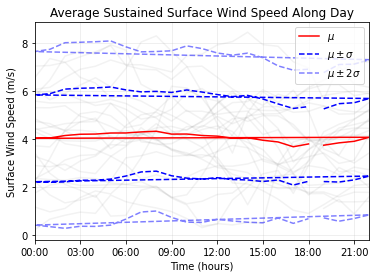

In [ ]:
env_analysis.plot_average_surface10m_wind_speed_along_day()

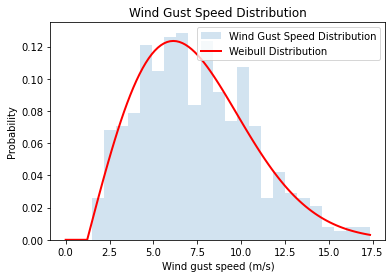

In [ ]:
env_analysis.plot_wind_gust_distribution()


In [ ]:
env_analysis.animate_average_wind_rose(filename="wind_rose.gif")

NameError: ignored

In [ ]:
env_analysis.animate_wind_gust_distribution_over_average_day()

In [ ]:
env_analysis.calculate_average_sustained_surface10m_wind_along_day()

({'19': 3.7440466337635363,
  '20': 3.8423959767323868,
  '21': 3.906904368674765,
  '22': 4.075420512666729,
  '0': 4.031363208366074,
  '1': 4.044612860257478,
  '2': 4.148112785069263,
  '3': 4.2007141701229,
  '4': 4.208670335720465,
  '5': 4.2517321649295665,
  '6': 4.254225519361703,
  '7': 4.298247484664711,
  '8': 4.325330496705583,
  '9': 4.206791066167962,
  '10': 4.209703365970328,
  '11': 4.1491410126204835,
  '12': 4.122392506091072,
  '13': 4.0417248126735625,
  '14': 4.057709513807922,
  '15': 3.9509602796795353,
  '16': 3.880466770129297,
  '17': 3.680033461962027,
  '18': 3.7972041259797664},
 {'19': 1.5123234957044724,
  '20': 1.6314288243680208,
  '21': 1.6064509124749184,
  '22': 1.6151036514466173,
  '0': 1.8065223131493888,
  '1': 1.8458346501852618,
  '2': 1.9322424904693045,
  '3': 1.9153598358715056,
  '4': 1.922465640495659,
  '5': 1.9175542186129029,
  '6': 1.7934166422175324,
  '7': 1.667185910193583,
  '8': 1.6607230638691952,
  '9': 1.7342503614539448,
  '

In [ ]:
wind_speed_mean = env_analysis.average_surface10m_wind_speed_at_given_hour.values()
wind_speed_mean = np.array(list(wind_speed_mean))
wind_speed_std = np.array(
            list(env_analysis.average_surface10m_wind_speed_sigmas_at_given_hour.values())
        )
print(wind_speed_mean)

[3.74404663 3.84239598 3.90690437 4.07542051 4.03136321 4.04461286
 4.14811279 4.20071417 4.20867034 4.25173216 4.25422552 4.29824748
 4.3253305  4.20679107 4.20970337 4.14914101 4.12239251 4.04172481
 4.05770951 3.95096028 3.88046677 3.68003346 3.79720413]


In [ ]:
wind_speeds_p1sigma = wind_speed_mean + wind_speed_std
print(wind_speeds_p1sigma)

[5.25637013 5.4738248  5.51335528 5.69052416 5.83788552 5.89044751
 6.08035528 6.11607401 6.13113598 6.16928638 6.04764216 5.96543339
 5.98605356 5.94104143 6.04532257 5.95851403 5.8540313  5.7680887
 5.81821272 5.66890523 5.46396528 5.27483756 5.35281446]


In [ ]:
wind_speeds_m1sigma = wind_speed_mean - wind_speed_std
print(wind_speeds_m1sigma)

[2.23172314 2.21096715 2.30045346 2.46031686 2.2248409  2.19877821
 2.21587029 2.28535433 2.2862047  2.33417795 2.46080888 2.63106157
 2.66460743 2.4725407  2.37408416 2.339768   2.39075371 2.31536093
 2.29720631 2.23301533 2.29696826 2.08522937 2.24159379]


In [ ]:
wind_speeds_p2sigma = wind_speed_mean + 2 * wind_speed_std
print(wind_speeds_p2sigma)

[6.76869363 7.10525363 7.11980619 7.30562782 7.64440783 7.73628216
 8.01259777 8.03143384 8.05360162 8.0868406  7.8410588  7.63261931
 7.64677662 7.67529179 7.88094178 7.76788704 7.58567009 7.49445258
 7.57871592 7.38685019 7.04746378 6.86964165 6.9084248 ]


In [ ]:
wind_speeds_m2sigma = wind_speed_mean - 2 * wind_speed_std
print(wind_speeds_m1sigma)

[2.23172314 2.21096715 2.30045346 2.46031686 2.2248409  2.19877821
 2.21587029 2.28535433 2.2862047  2.33417795 2.46080888 2.63106157
 2.66460743 2.4725407  2.37408416 2.339768   2.39075371 2.31536093
 2.29720631 2.23301533 2.29696826 2.08522937 2.24159379]


In [ ]:
with open('filename.csv', mode='a', newline='') as file:
    writer = csv.writer(file)

    wind_speed = []
    for hour_entries in env_analysis.surfaceDataDict.values():
        for val in hour_entries.values():
            wind_speed_hour = (val["surface10mWindVelocityX"] ** 2 + val["surface10mWindVelocityY"] ** 2) ** 0.5
            wind_speed.append(wind_speed_hour)
            if len(wind_speed) == 24:
                print(wind_speed)
                writer.writerow(wind_speed)
                wind_speed = []

  

[1.1148862960064396, 1.488712851798914, 0.8811082361873614, 1.613740395335755, 1.172816720825945, 0.9704111389393832, 1.1117107776188757, 1.5637274035535795, 1.8393334087037276, 1.7161511187722238, 2.2900160517066794, 3.226197515563583, 4.391541752198051, 6.19950285055583, 6.125849420165381, 5.735111560117989, 5.584312084325737, 4.997856731047346, 4.735561223944261, 4.977685656392266, 4.969869934233673, 4.610038405354974, 3.9460327681533958, 3.9170261096754304]
[3.2976067217415417, 3.0046396767224373, 3.426349276362346, 3.2815936139248563, 3.0681576107719954, 2.6954433053049986, 3.0881440367536483, 3.2909685058438543, 3.7687491306821164, 3.7402125219886755, 4.479046605859088, 3.984524375514494, 3.533504895382534, 3.311998402307761, 3.346196909696207, 3.2447697246376084, 2.3710588434098, 1.2655041287374402, 2.3946952339808245, 2.469975033162653, 2.547479959133069, 1.6731663906011787, 2.123134015547244, 2.8189627057759967]
[2.5031521538560635, 1.9943259130893993, 2.3409153238231943, 2.67